In [3]:
# import libraries  and packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# About features of Dataset

Podcast_Name (Type: string)
Description: Names of popular podcasts.
Example Values: "Tech Talk", "Health Hour", "Comedy Central"

Episode_Title (Type: string)
Description: Titles of the podcast episodes.
Example Values: "The Future of AI", "Meditation Tips", "Stand-Up Special"

Episode_Length (Type: float, minutes)
Description: Length of the episode in minutes.
Example Values: 5.0, 10.0, 30.0, 45.0, 60.0, 90.0

Genre (Type: string)
Description: Genre of the podcast episode.
Possible Values: "Technology", "Education", "Comedy", "Health", "True Crime", "Business", "Sports", "Lifestyle", "News", "Music"

Host_Popularity (Type: float, scale 0-100)
Description: A score indicating the popularity of the host.
Example Values: 50.0, 75.0, 90.0

Publication_Day (Type: string)
Description: Day of the week the episode was published.
Possible Values: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"

Publication_Time (Type: string)
Description: Time of the day the episode was published.
Possible Values: "Morning", "Afternoon", "Evening", "Night"

Guest_Popularity (Type: float, scale 0-100)
Description: A score indicating the popularity of the guest (if any).
Example Values: 20.0, 50.0, 85.0

Number_of_Ads (Type: int)
Description: Number of advertisements within the episode.
Example Values: 0, 1, 2, 3

Episode_Sentiment (Type: string)
Description: Sentiment of the episode's content.
Possible Values: "Positive", "Neutral", "Negative"

Listening_Time (Type: float, minutes)
Description: The actual average listening duration (target variable).
Example Values: 4.5, 8.0, 30.0, 60.0





In [4]:
#Load train dataset and gender_submission dataset into Dataframe
df = pd.read_csv("../Data/playground-series-s5e4/train.csv")


In [5]:
# view first 5 columns of train dataset
df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [6]:
# view descriptive statistics of dataset
df.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [7]:
df.shape

(750000, 12)

In [8]:
# observe data types
df.dtypes

id                               int64
Podcast_Name                    object
Episode_Title                   object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Listening_Time_minutes         float64
dtype: object

In [9]:
# find missing values within dataset
df.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [ ]:
df.duplicated().sum()

In [10]:
# Fill in  missing values for "Episode_Length_minutes","Guest_Popularity_percentage","Number_of_Ads"

df["Episode_Length_minutes"] = df.groupby("Podcast_Name")["Episode_Length_minutes"].transform(
    lambda x: x.fillna(x.median()))

df["Guest_Popularity_percentage"] = df.groupby("Podcast_Name")["Guest_Popularity_percentage"].transform(
    lambda x: x.fillna(x.median()))


df["Number_of_Ads"] = df.groupby("Podcast_Name")["Number_of_Ads"].transform(
    lambda x: x.fillna(x.median()))


In [11]:

df.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

## Univariate Analysis

In [13]:
df_Genre =df.value_counts("Genre")
df_Genre.to_frame()

,count
Genre,
Sports,87606
Technology,86256
True Crime,85059
Lifestyle,82461
Comedy,81453
Business,80521
Health,71416
News,63385
Music,62743


In [14]:
df_day =df.value_counts("Publication_Day")
df_day.to_frame()

,count
Publication_Day,
Sunday,115946
Monday,111963
Friday,108237
Wednesday,107886
Thursday,104360
Saturday,103505
Tuesday,98103


In [15]:
df_time =df.value_counts("Listening_Time_minutes")
df_time.to_frame()

,count
Listening_Time_minutes,
0.00000,8551
5.82000,124
8.75000,108
10.55000,108
19.71000,98
...,...
19.62692,3
51.62846,3
50.74736,2


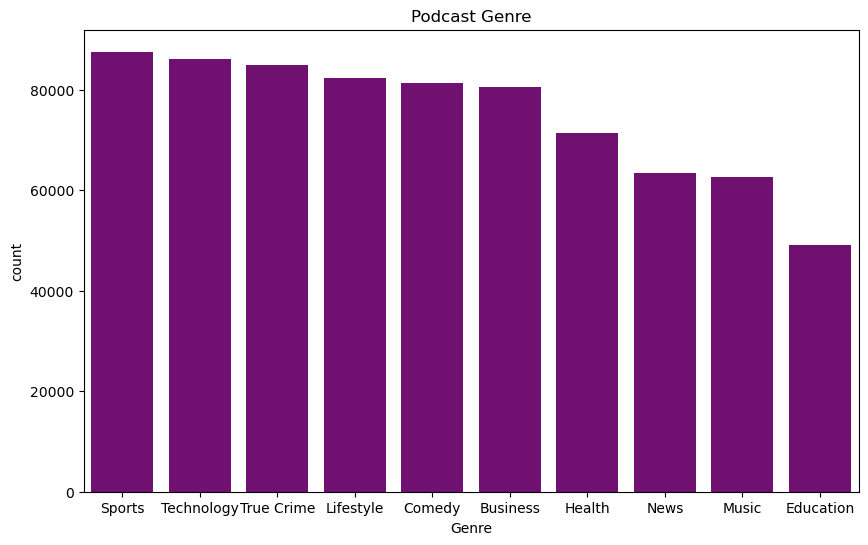

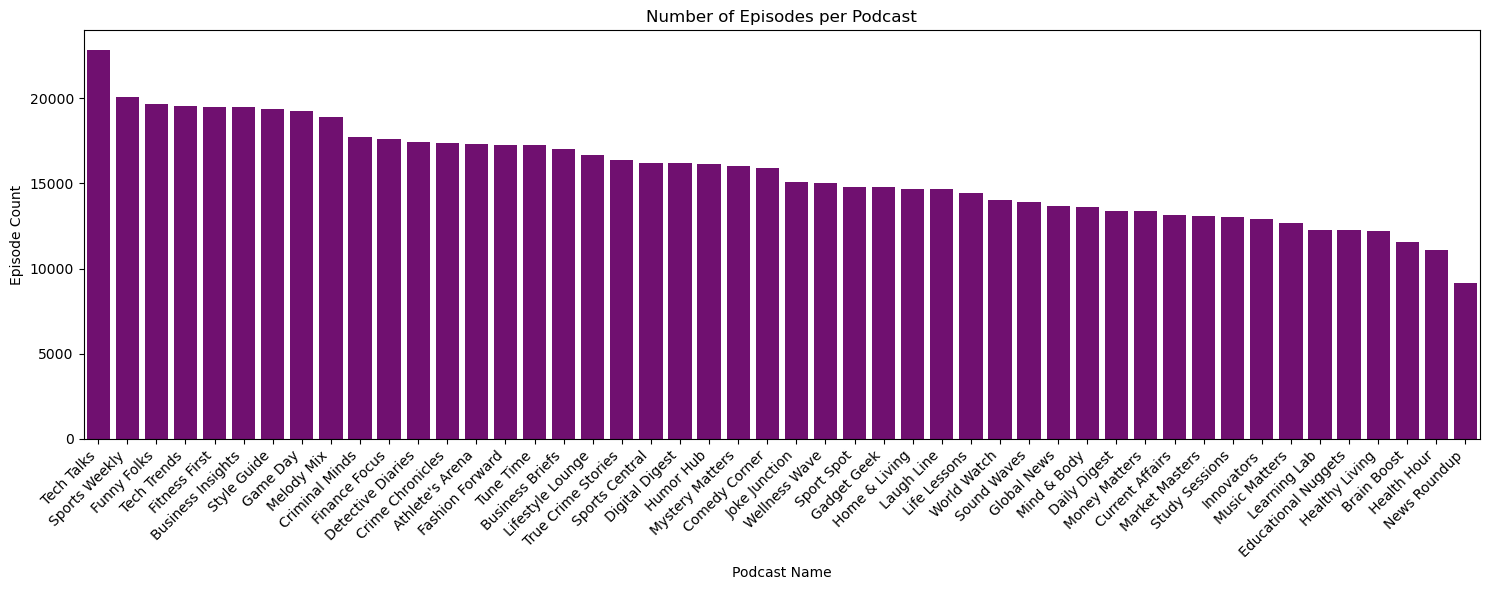

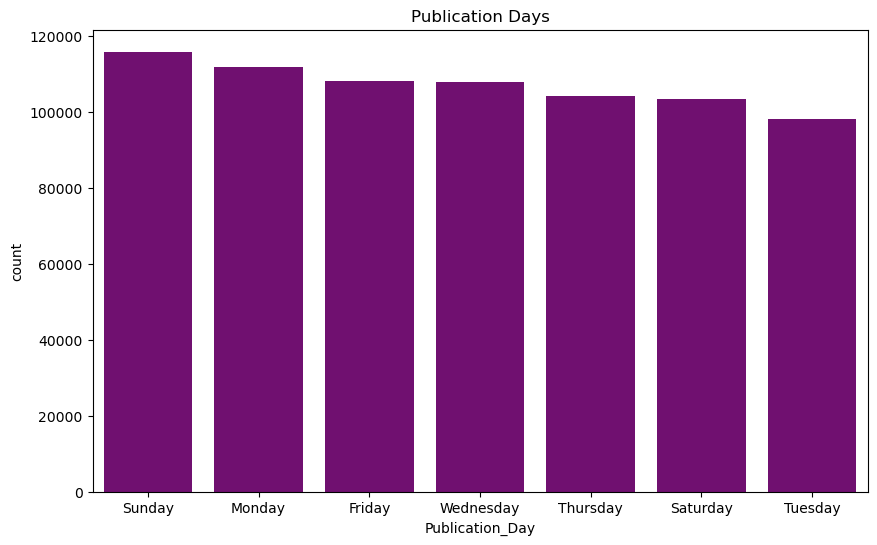

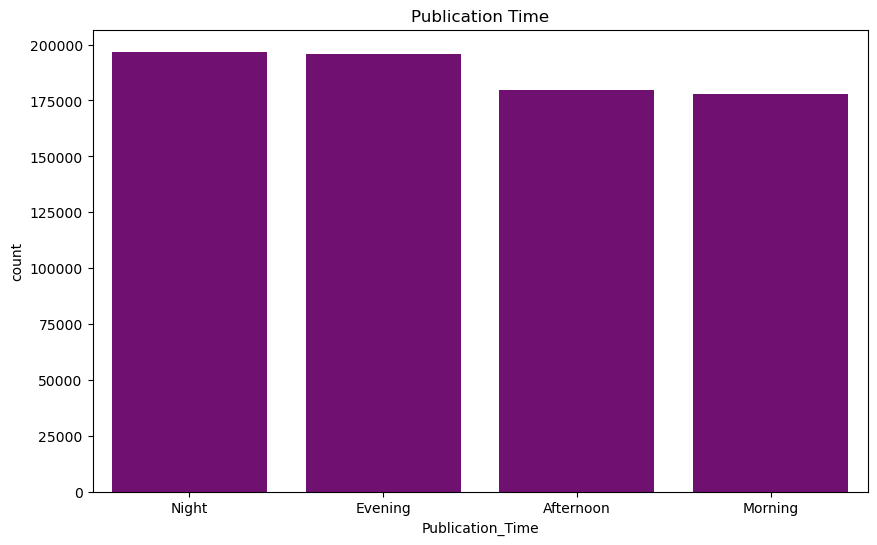

In [16]:
#Plot are bar graph with showing the various genres within the dataset
#Get the count of each Genre as a DataFrame
Genre_counts = df["Genre"].value_counts().reset_index()
Genre_counts.columns = ["Genre", "count"]

#Plot histogram of showing "topic" within dataset
plt.figure(figsize=(10,6))
sns.barplot(data = Genre_counts,x = "Genre",y ="count",color="purple")
plt.title("Podcast Genre",loc= "center")
plt.show()



#Use groupby to to find mean of Episode_Length_minutes 

episode_counts = df.groupby("Podcast_Name")["Episode_Title"].count().reset_index()
episode_counts.columns = ["Podcast_Name", "Episode_Count"]
episode_counts = episode_counts.sort_values("Episode_Count", ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(data =episode_counts,x = "Podcast_Name",y ="Episode_Count",color="purple")
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for readability
plt.title("Number of Episodes per Podcast")
plt.xlabel("Podcast Name")
plt.ylabel("Episode Count")
plt.tight_layout()
plt.show()


#Get the count of each "Publication_Day" as a DataFrame
Pub_counts = df["Publication_Day"].value_counts().reset_index()
Pub_counts.columns = ["Publication_Day", "count"]

#Plot histogram of showing "Publication_Day" within dataset
plt.figure(figsize=(10,6))
sns.barplot(data = Pub_counts,x = "Publication_Day",y ="count",color="purple")
plt.title("Publication Days",loc= "center")
plt.show()

# Get the count of each "Publication_Time" as a DataFrame
Time_counts = df["Publication_Time"].value_counts().reset_index()
Time_counts.columns = ["Publication_Time", "count"]


#Plot histogram of showing "Publication_Times" within dataset
plt.figure(figsize=(10,6))
sns.barplot(data = Time_counts,x = "Publication_Time",y ="count",color="purple")
plt.title("Publication Time",loc= "center")
plt.show()

#### Podcast Insights:

* Overall Trend of Diversification: While Sports leads, there's a presence across a variety of genres, indicating a diverse range of topics covered in the podcasting world.

* Tech Talks Leads in Volume: The podcast labeled "Tech Talks" has the highest number of episodes by a considerable margin. This could indicate a long history, a very frequent publishing schedule, or a combination of both.

* Sunday as the Most Popular Publication Day: Sunday shows the highest number of podcast publications. This could suggest that many creators aim to release new episodes at the beginning of the week, potentially for listeners to enjoy during their commute or leisure time on Monday

* Night and Evening Peaks: The "Night" and "Evening" periods show the highest number of podcast publications, with very similar counts. This suggests that a significant portion of creators tend to publish their episodes in the latter half of the day.



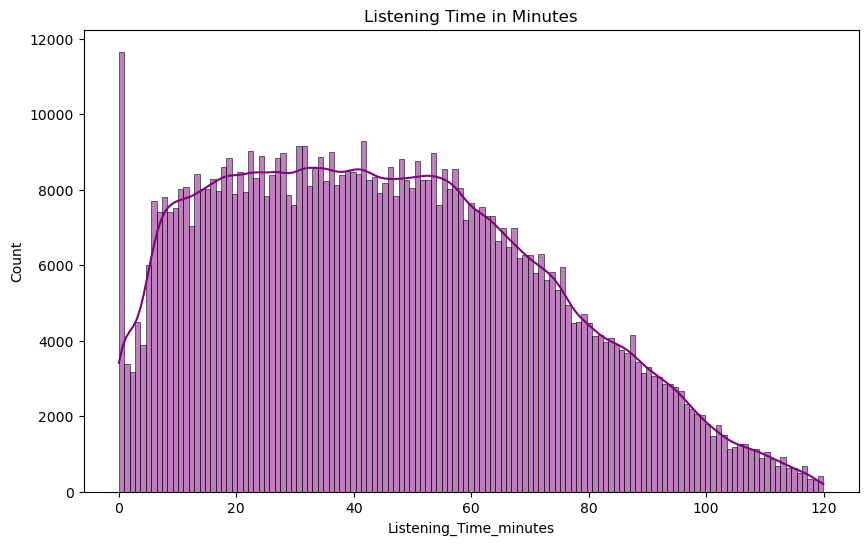

In [17]:
 # Plot histogram of "Listening_Time_minutes"
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "Listening_Time_minutes",kde=True,color="purple")
plt.title("Listening Time in Minutes",loc= "center")
plt.show()

* The distrubution for "Listening_Time_minutes is right skewed there's a long tail extending towards longer listening times, while the majority of listening sessions are concentrated at shorter durations.

* Peak Around the 20-60 Minute Mark: There's a noticeable peak in listening frequency between approximately 20 and 60 minutes. This suggests that a significant number of listening sessions fall within this typical podcast episode length.

* Relatively Few Very Long Listening Sessions: The tail of the distribution shows that very long listening sessions (over 90-100 minutes) are relatively infrequent.

In [18]:
df_Sent =df.value_counts("Episode_Sentiment")
df_Sent.to_frame()

,count
Episode_Sentiment,
Neutral,251291
Negative,250116
Positive,248593


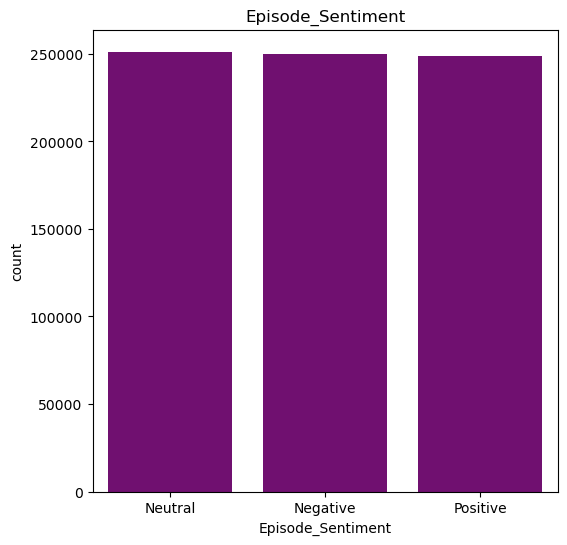

In [19]:
# plot bargraph of "Episode_Sentiment" with value count 
topic_counts = df["Episode_Sentiment"].value_counts().reset_index()
topic_counts.columns = ["Episode_Sentiment", "count"]

plt.figure(figsize=(6,6))
sns.barplot(data = topic_counts,x = "Episode_Sentiment",y ="count",color="purple")
plt.title("Episode_Sentiment",loc= "center")
plt.show()


## Bivariate Analysis

In [20]:
# seperate categorical and numerical features
Num =[['Episode_Length_minutes','Host_Popularity_percentage','Guest_Popularity_percentage','Number_of_Ads','Episode_Sentiment', 'Listening_Time_minutes']]
Cat =[['id','Podcast_Name','Episode_Title','Genre','Publication_Day',]]

Text(0, 0.5, 'Listening Time (minutes)')

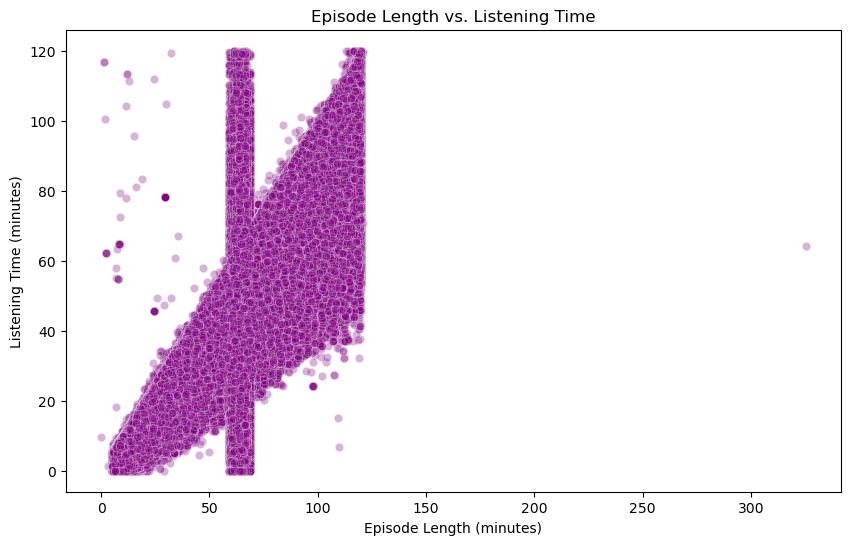

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Episode_Length_minutes", y="Listening_Time_minutes", color= "purple",alpha=0.3)
plt.title("Episode Length vs. Listening Time")
plt.xlabel("Episode Length (minutes)")
plt.ylabel("Listening Time (minutes)")

* Concentration at Shorter Episode Lengths: The highest density of data points appears at shorter episode lengths (below 60 minutes), suggesting that a large portion of podcasts have shorter durations, and these are frequently listened to for their entirety or a significant portion.

/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_7885/2505876729.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


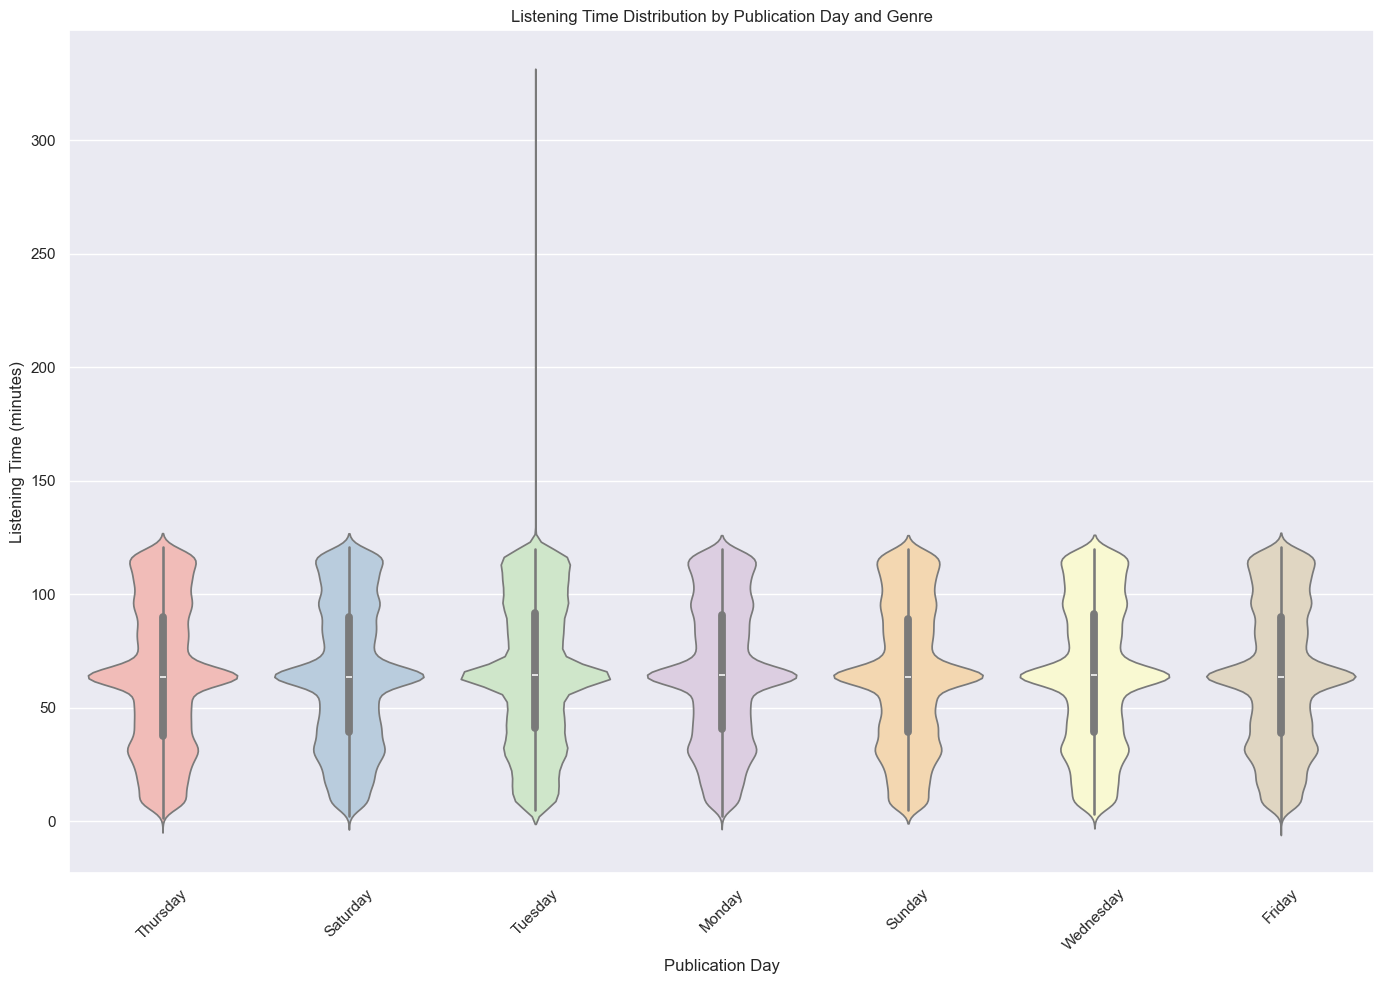

In [22]:
sns.set_theme(style="darkgrid")

# Grouped violin plot: Listening Time by Day, split by Genre
plt.figure(figsize=(14,10))
sns.violinplot(
    x="Publication_Day",
    y="Episode_Length_minutes",
    data=df,
    palette="Pastel1",
    split=False  # change to True if you want overlapping sides
)

plt.title("Listening Time Distribution by Publication Day and Genre")
plt.xlabel("Publication Day")
plt.ylabel("Listening Time (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Outlier on Tuesday with Very Long Listening Time: There's a clear outlier on Tuesday with a listening time extending beyond 300 minutes. This is an unusual data point and might represent a very long episode or a user listening to multiple episodes in one session.

* Overall Consistency in Distribution Shape: Despite some minor variations, the overall shape of the listening time distribution (the width of the violins at different listening times) is relatively consistent across the different publication days. This implies that the general patterns of how long people listen to podcasts are somewhat independent of the day the podcast was published.

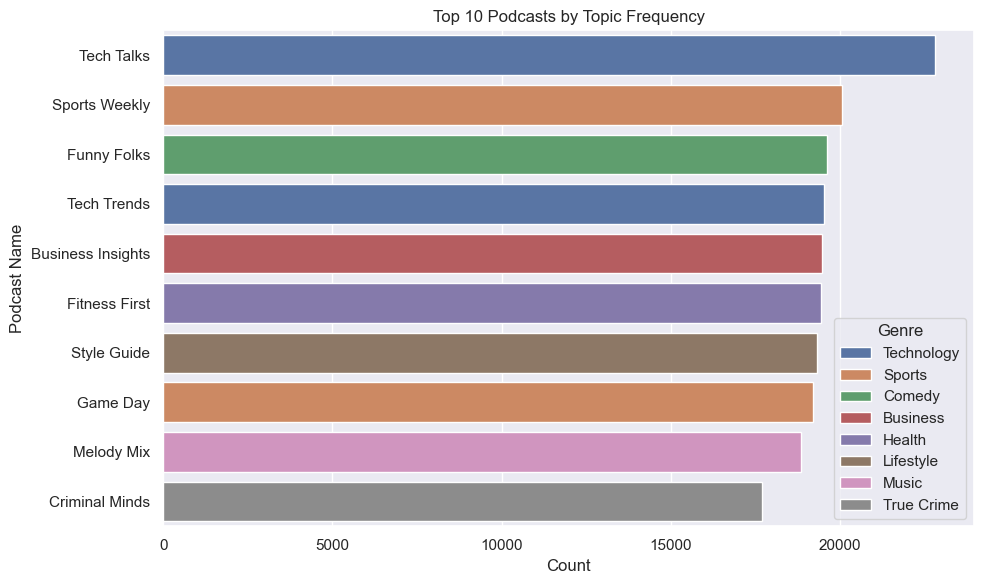

In [23]:
#use groupby for "genre"& "Podcast_Name"
Pod_genre_counts_df = df.groupby(["Genre", "Podcast_Name"]).size().reset_index(name='count')

top_podcasts = Pod_genre_counts_df.sort_values("count", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_podcasts, y="Podcast_Name", x="count", hue="Genre")
plt.title("Top 10 Podcasts by Topic Frequency")
plt.xlabel("Count")
plt.ylabel("Podcast Name")
plt.tight_layout()
plt.show()

* "Tech Talks" Dominates in Frequency: "Tech Talks" has the highest topic frequency by a significant margin, indicating it covers a wide range of topics or discusses topics very frequently. It's categorized under the "Technology" genre.

* "Sports Weekly" is a Strong Second: "Sports Weekly" has the second-highest topic frequency and belongs to the "Sports" genre, aligning with the earlier observation of the "Sports" genre having a high overall count of podcasts.

* Variety of Genres in the Top 10: The top 10 list includes podcasts from various genres, including "Technology," "Sports," "Comedy" ("Funny Folks"), "Business" ("Business Insights"), "Health" ("Fitness First"), "Lifestyle" ("Style Guide"), "Music" ("Melody Mix"), and "True Crime" ("Criminal Minds"). This suggests that high topic frequency isn't limited to a single genre.

## Multivariate Analysis


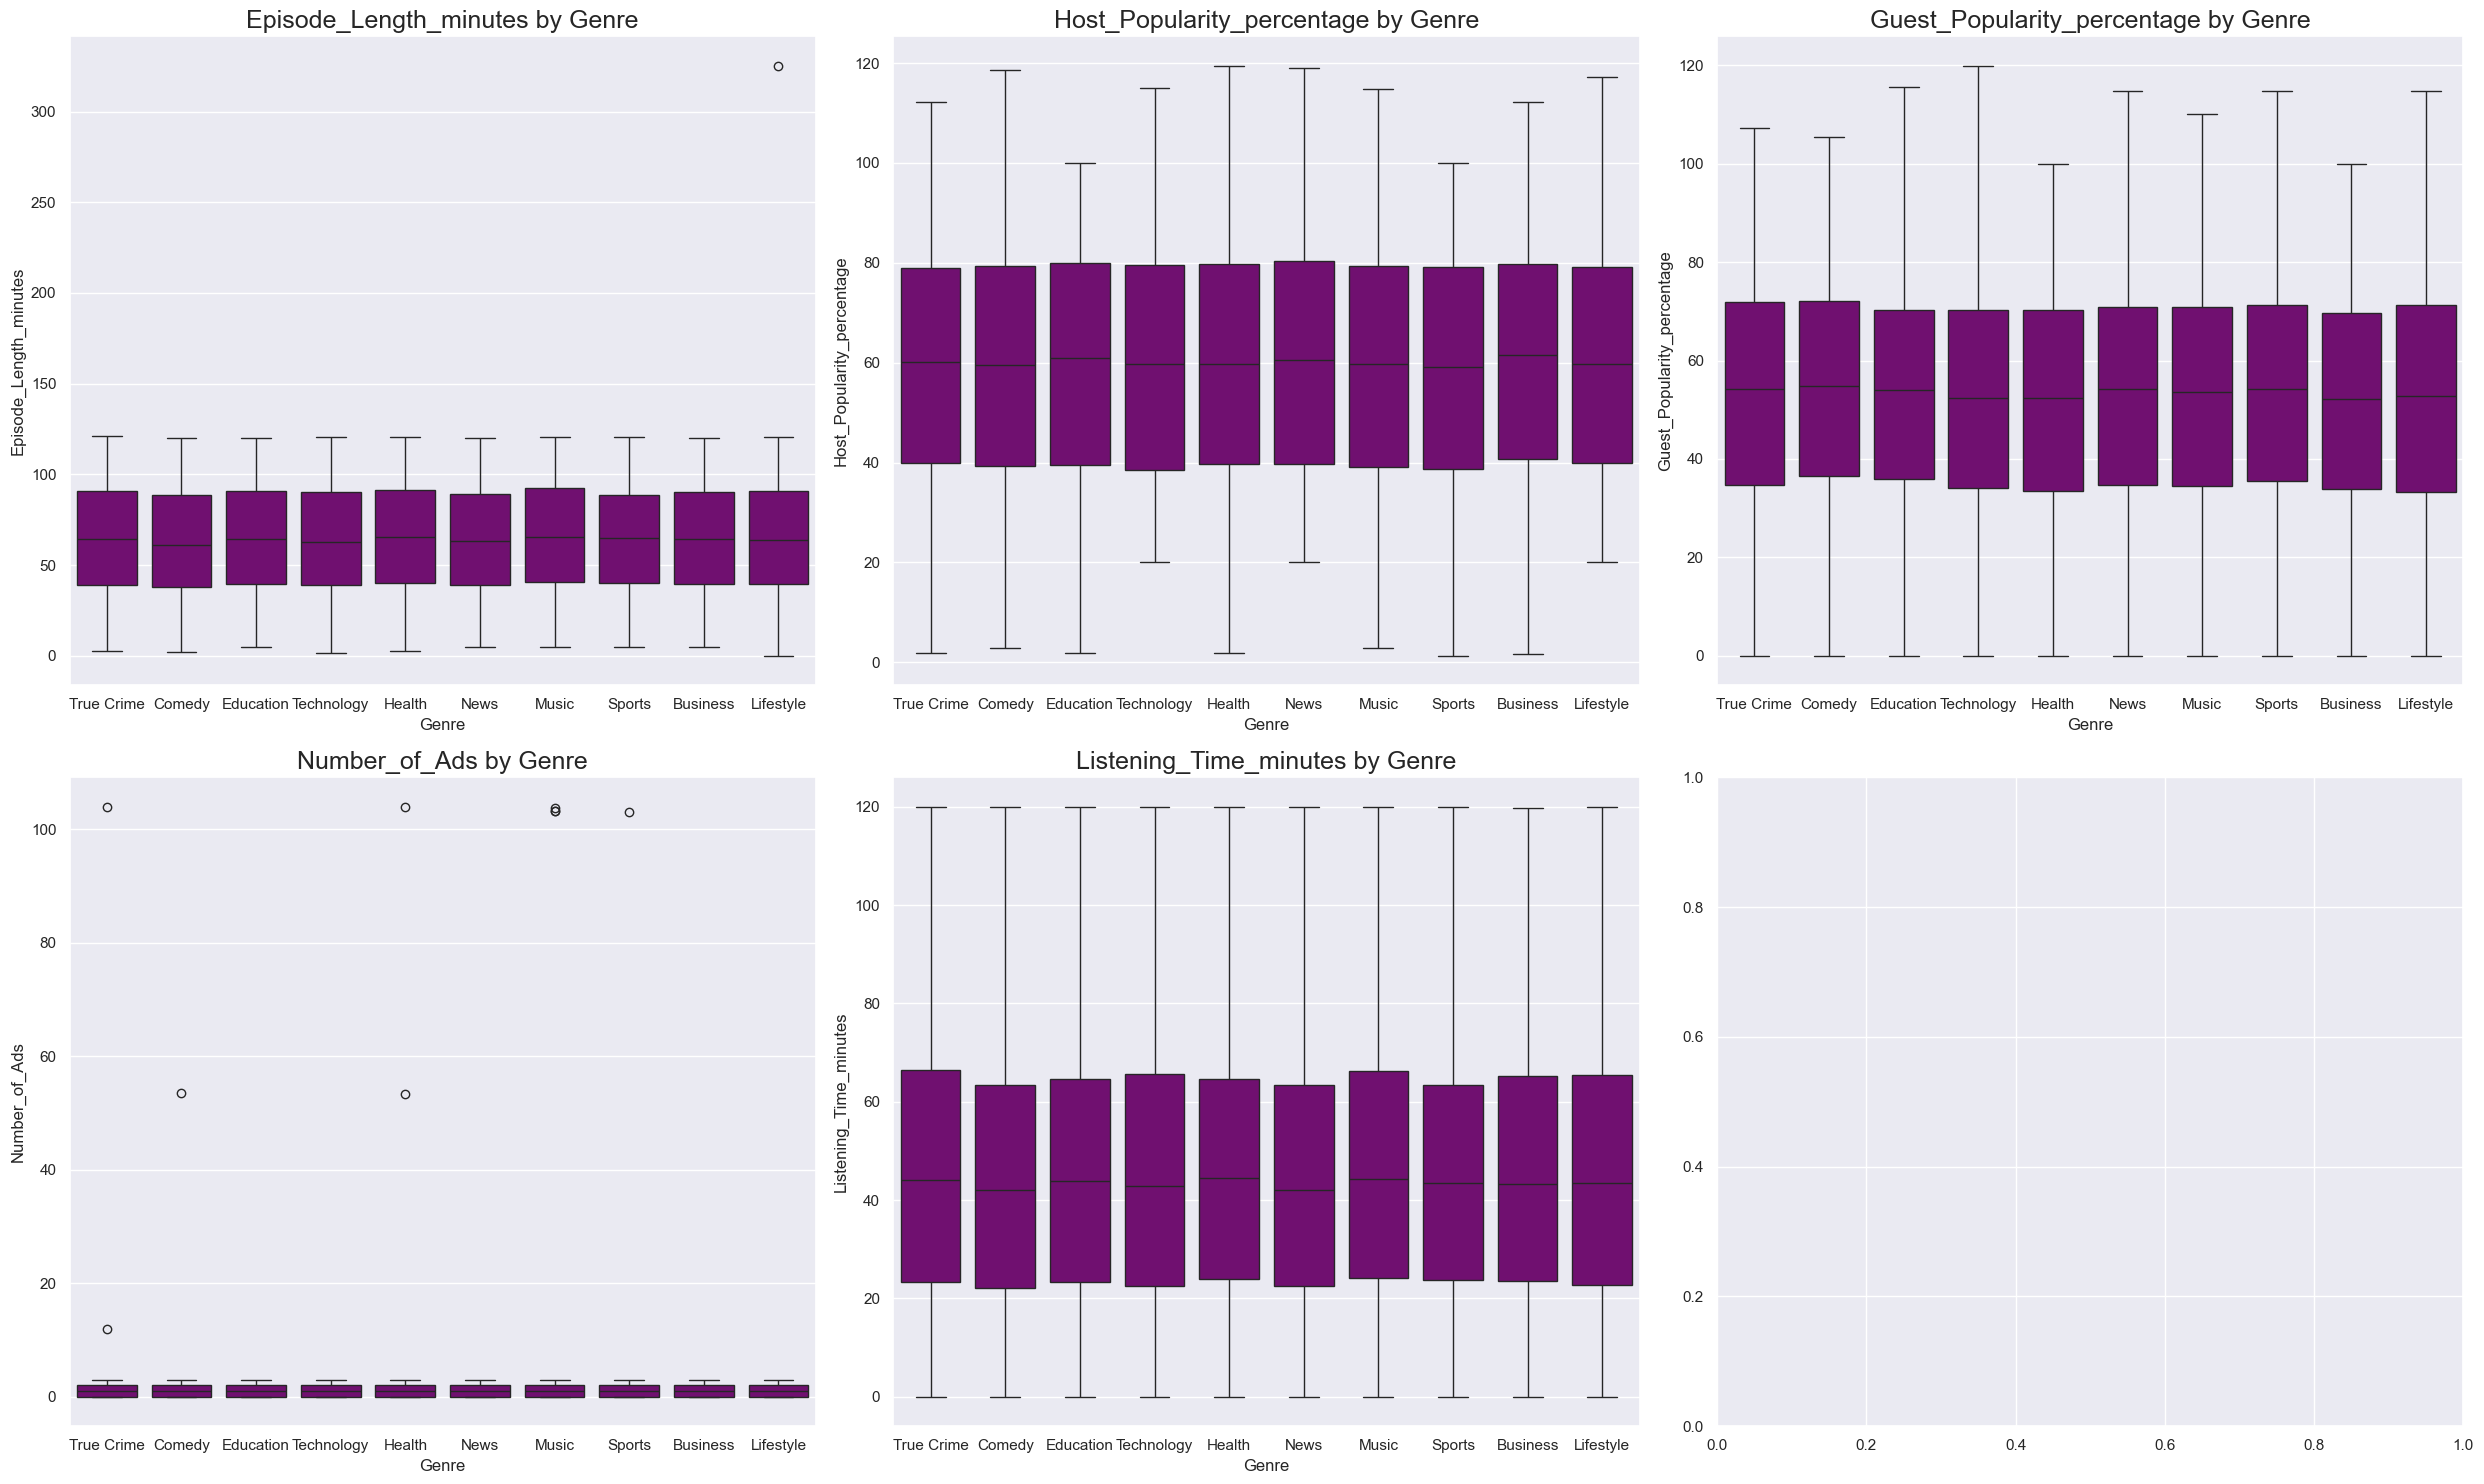

In [24]:
#Explore various feature vs “Genre” using lineplot 
numeric_features = [
    "Episode_Length_minutes", "Host_Popularity_percentage", 
    "Guest_Popularity_percentage", "Number_of_Ads", 
    "Listening_Time_minutes"
]

fig, axes = plt.subplots(2, 3, figsize=(25, 15))  # 6 plots for 6 features

for idx, feature in enumerate(numeric_features):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    sns.boxplot(data=df, x="Genre", y=feature, ax=ax,color="purple")
    ax.set_title(f"{feature} by Genre", fontsize=18)
    ax.set_xlabel("Genre")
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

### Overall Trends in Boxplot

* Episode length and listening time show more variability within genres compared to host/guest  popularity and episode sentiment.

* Host popularity tends to be high and less variable than guest popularity.

* The number of ads is generally low, but some genres and individual podcasts have significantly more.
* Episode sentiment is overwhelmingly positive across all genres with very little variation.

* Median listening times are fairly consistent across genres, but some genres attract a wider range of listening durations.

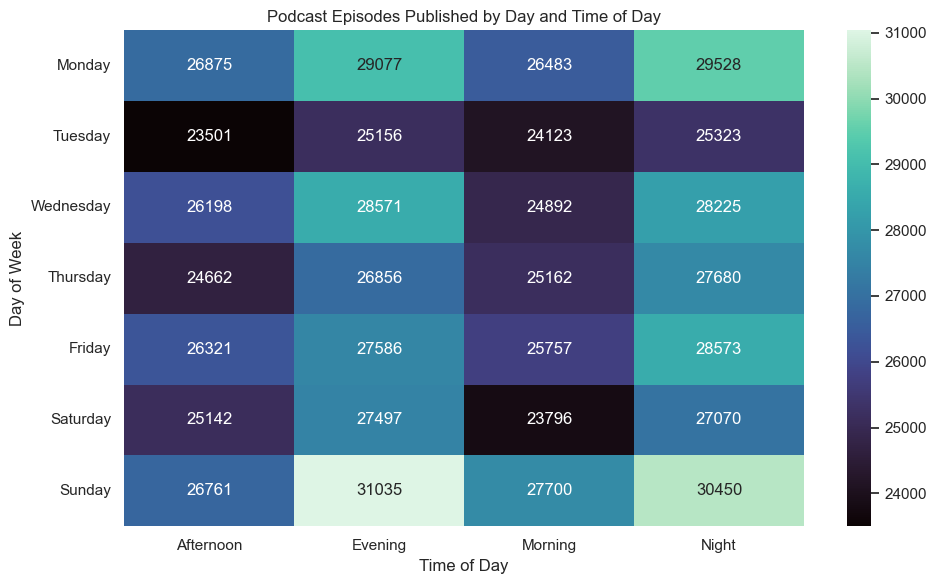

In [25]:
heatmap_data = df.groupby(['Publication_Day', 'Publication_Time']).size().unstack().fillna(0)

# Reorder of "Publication_Day"
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap="mako")
plt.title("Podcast Episodes Published by Day and Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

### Key Trends

* Sunday evening is the most popular time to publish new podcast episodes.

* Evenings and nights generally see higher publication activity throughout the week.

* Tuesday tends to be the least active day for podcast releases.

* Mornings are typically the least popular time for publishing.

<function matplotlib.pyplot.show(close=None, block=None)>

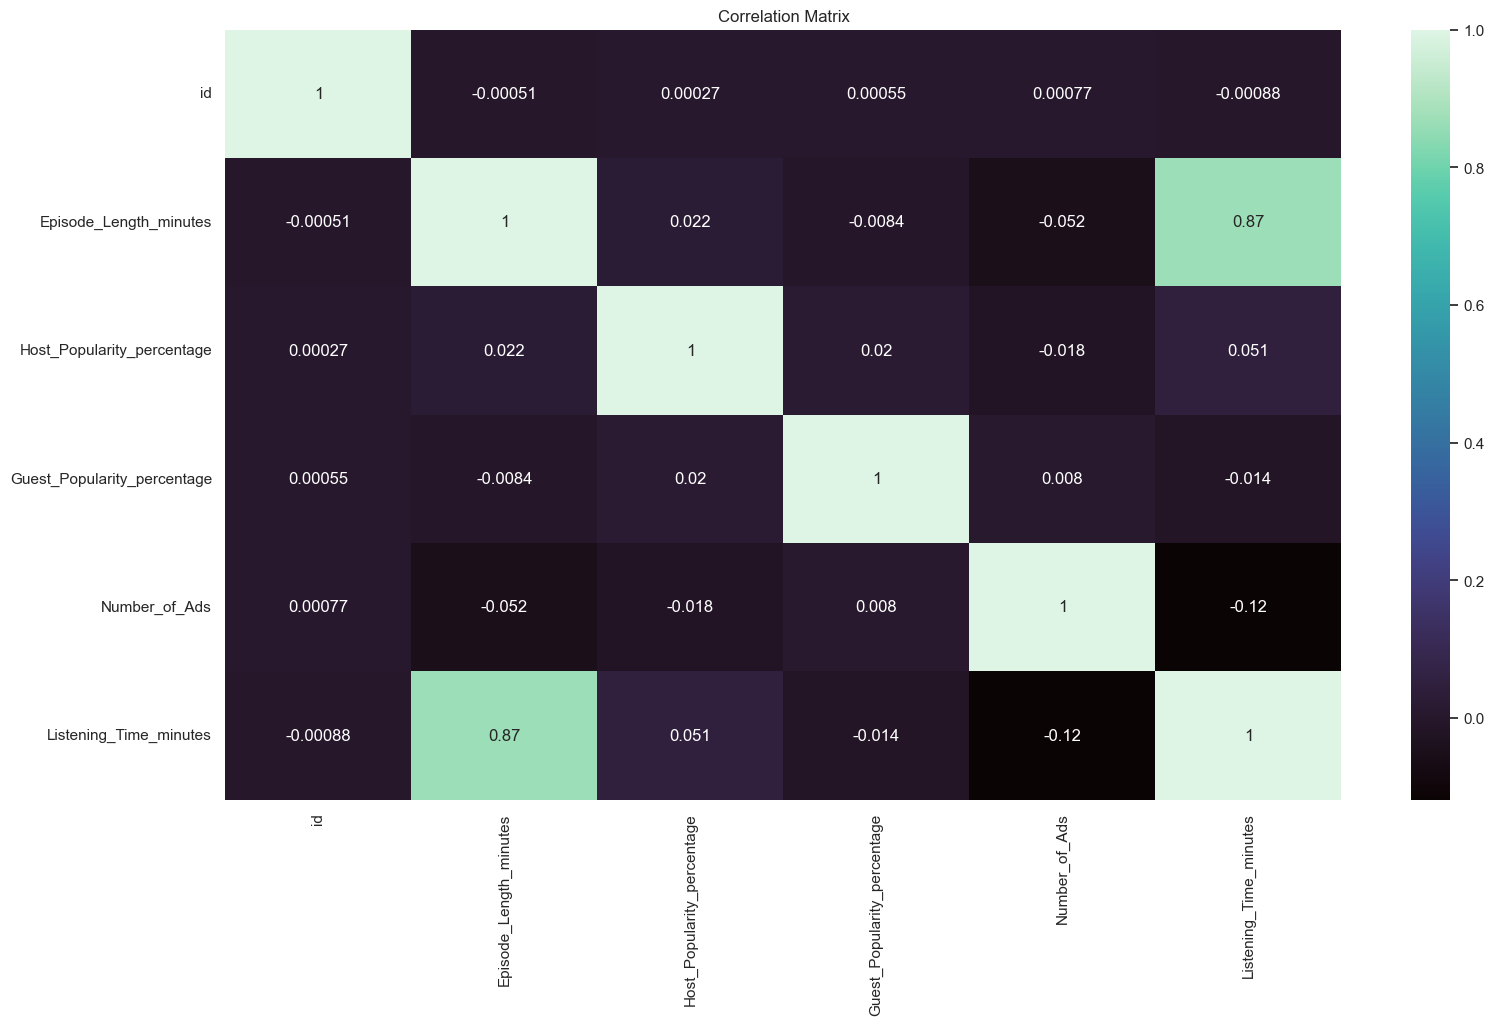

In [28]:
#Create a heatmap of all numberical variabes
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix, annot= True, cmap = 'mako')
plt.title('Correlation Matrix')
plt.show


### Key Takeaways

* The most significant linear relationship is between how long an episode is and how long people listen to it.

* The number of ads has a slight negative association with episode length and listening time.

* Host and guest popularity don't appear to be strong predictors of episode length or listening time.


#### Hypothesis: Podcast listening duration is primarily driven by episode length and publication timing, with genre influencing content format and release schedules
